# Trabajo Practico 4

In [4]:
install.packages("adabag")
library("adabag")
install.packages("randomForest")
library("randomForest")
library("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘iterators’, ‘caret’, ‘foreach’, ‘doParallel’


Loading required package: rpart

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The foll

In [5]:
data = load("/content/TP4.Rdata")
data

[1] "esp_train"    "RRL"          "esp_test"     "diag_test"    ".Random.seed"
[6] "diag_train"

# Ejercicio 1

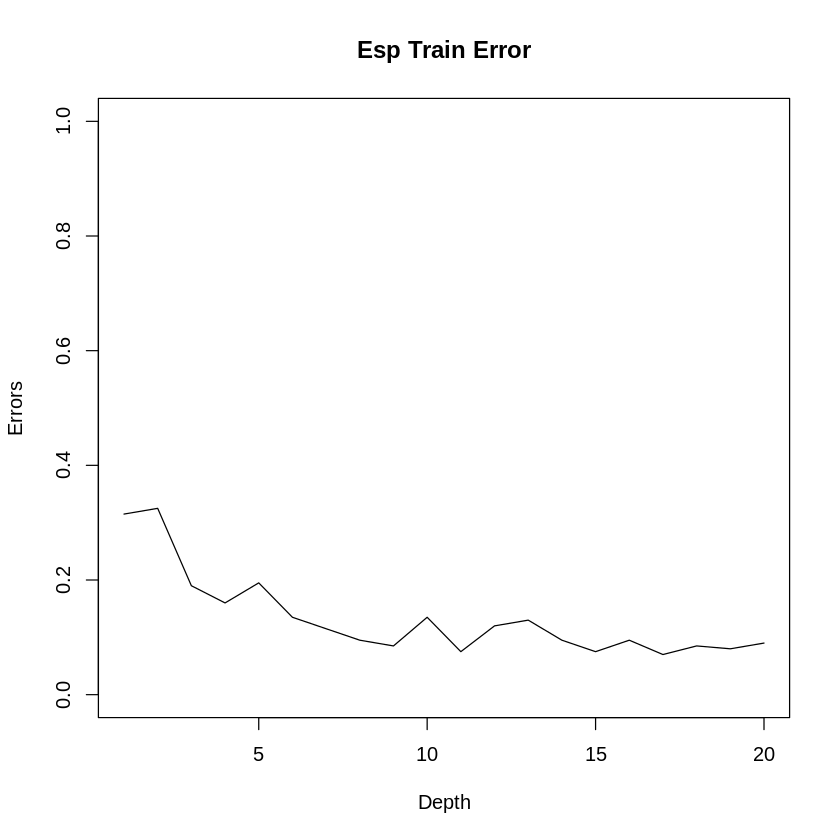

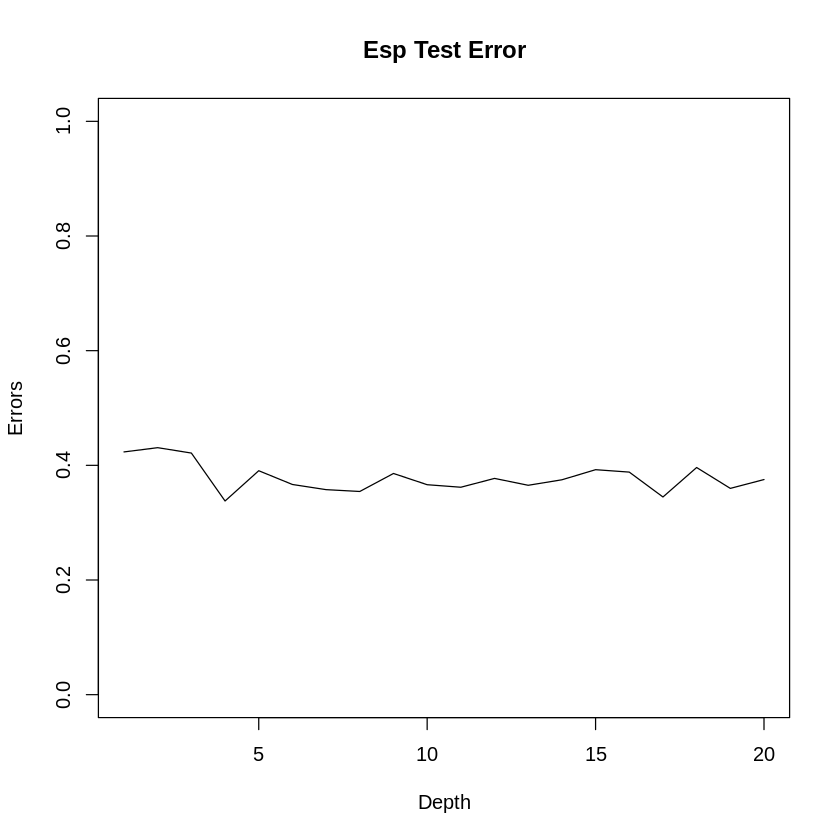

In [ ]:
esp.train.error = c()
esp.test.error = c()

for (depth in 1:20) {
  esp.adaboost = boosting(class ~., data=esp_train, mfinal = 10, coef="Freund", control=rpart.control(maxdepth=depth))
  esp.train.predict = predict(esp.adaboost, esp_train)
  esp.train.error = c(esp.train.error, esp.train.predict$error)

  esp.test.predict = predict(esp.adaboost, esp_test)
  esp.test.error = c(esp.test.error, esp.test.predict$error)
}

plot(c(1:20), esp.train.error, type="l", xlab="Depth", ylab="Errors", main="Esp Train Error", ylim=c(0,1))
plot(c(1:20), esp.test.error, type="l", xlab="Depth", ylab="Errors", main="Esp Test Error", ylim=c(0,1))

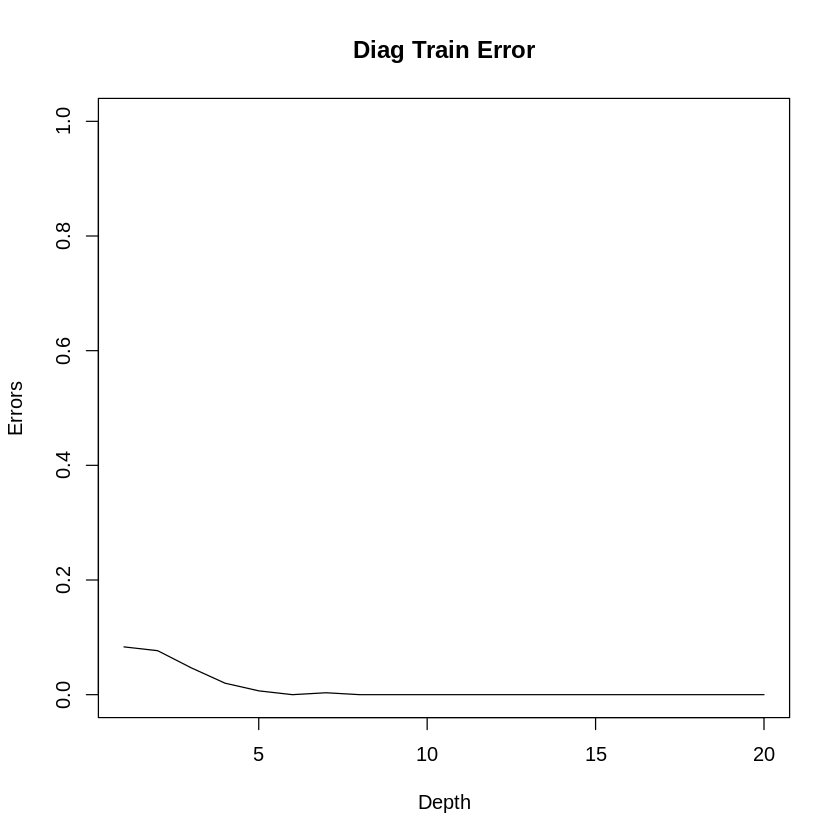

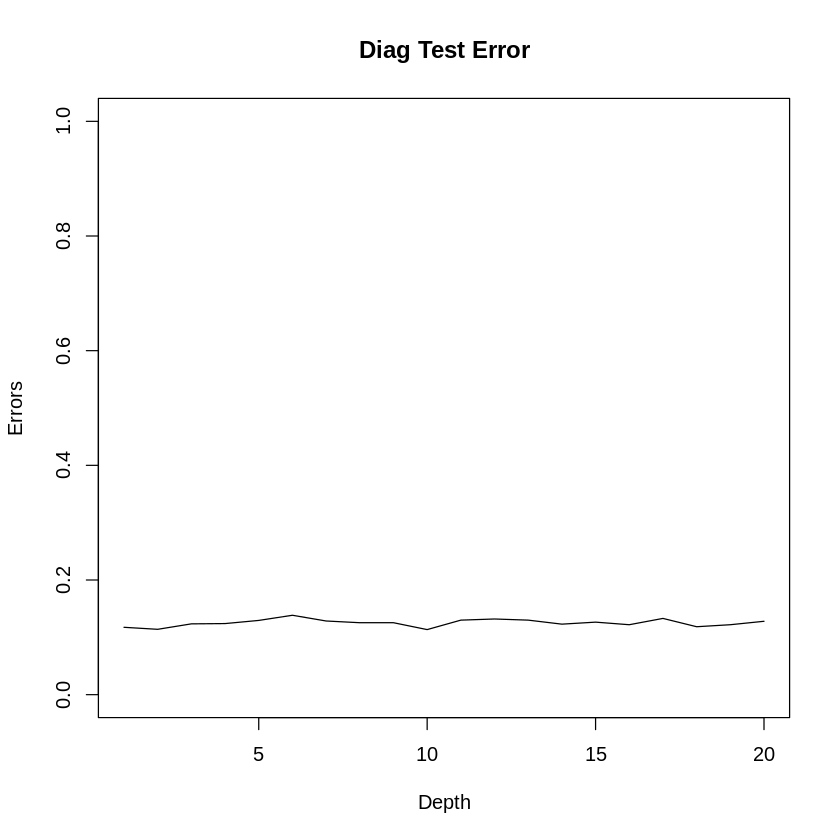

In [ ]:
diag.train.error = c()
diag.test.error = c()

for (depth in 1:20) {
  diag.adaboost = boosting(class ~., data=diag_train, mfinal = 10, coef="Freund", control=rpart.control(maxdepth=depth))
  diag.train.predict = predict(diag.adaboost, diag_train)
  diag.train.error = c(diag.train.error, diag.train.predict$error)

  diag.test.predict = predict(diag.adaboost, diag_test)
  diag.test.error = c(diag.test.error, diag.test.predict$error)
}

plot(c(1:20), diag.train.error, type="l", xlab="Depth", ylab="Errors", main="Diag Train Error", ylim=c(0,1))
plot(c(1:20), diag.test.error, type="l", xlab="Depth", ylab="Errors", main="Diag Test Error", , ylim=c(0,1))

# Ejercicio 2

In [3]:
rf.test = function(dataset, y) {
  n.vars = function(n) {
    res = c(n)
    cnt = n
    while (floor(cnt / 2) > 0) {
      cnt = floor(cnt/2)
      res = c(res, cnt)
    }
    return (res)
  }

  rf.errors = c()
  n.cols = ncol(dataset) - 1
  for (n in n.vars(n.cols)) {
    n.error = c()
    for (r in 1:5) {
      rf = randomForest(y, data=dataset, mtry=n, ntree=1000)
      rf.error = mean(rf$confusion[,3])
      n.error = c(n.error, rf.error)
    }

    rf.errors = c(rf.errors, mean(n.error))
  }

  return (list(n.vars=n.vars(n.cols), rf.errors=rf.errors))
}

In [ ]:
rrl.rf = rf.test(RRL, Tipo ~ .)

In [ ]:
rrl.rf

$n.vars
[1] 69 34 17  8  4  2  1

$rf.errors
[1] 0.04243626 0.03912181 0.03886686 0.03937677 0.04000000 0.04147309 0.04603399

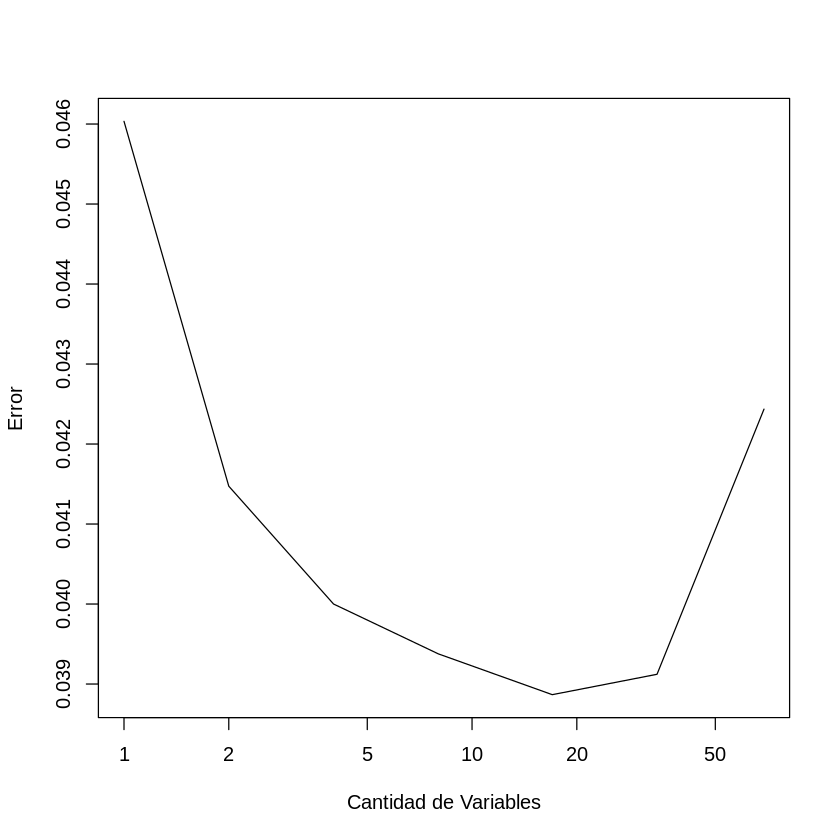

In [ ]:
plot(rrl.rf$n.vars, rrl.rf$rf.errors, type="l", xlab="Cantidad de Variables", ylab="Error", log="x")

## Conclusiones

Como podemos ver en el grafico, el menor error lo encontramos entre los valores 17 y 34, por lo que podemos concluir, que es mejor tomar esa cantidad de variables aleatorias en cada paso del RF. Pero si vemos los valores de error, podemos ver que son muy bajos, asique no cambia mucho la cantidad de variables que tomemos.

# Ejercicio 3

## Random Forest

In [ ]:
load("/content/lampone.Rdata")
lampone.data = lampone[-c(1, 144)]

In [ ]:
lampone.rf = rf.test(lampone.data, N_tipo ~ .)
lampone.rf

$n.vars
[1] 141  70  35  17   8   4   2   1

$rf.errors
[1] 0.16952862 0.10892256 0.09579125 0.10488215 0.10488215 0.10942761 0.11397306
[8] 0.14242424

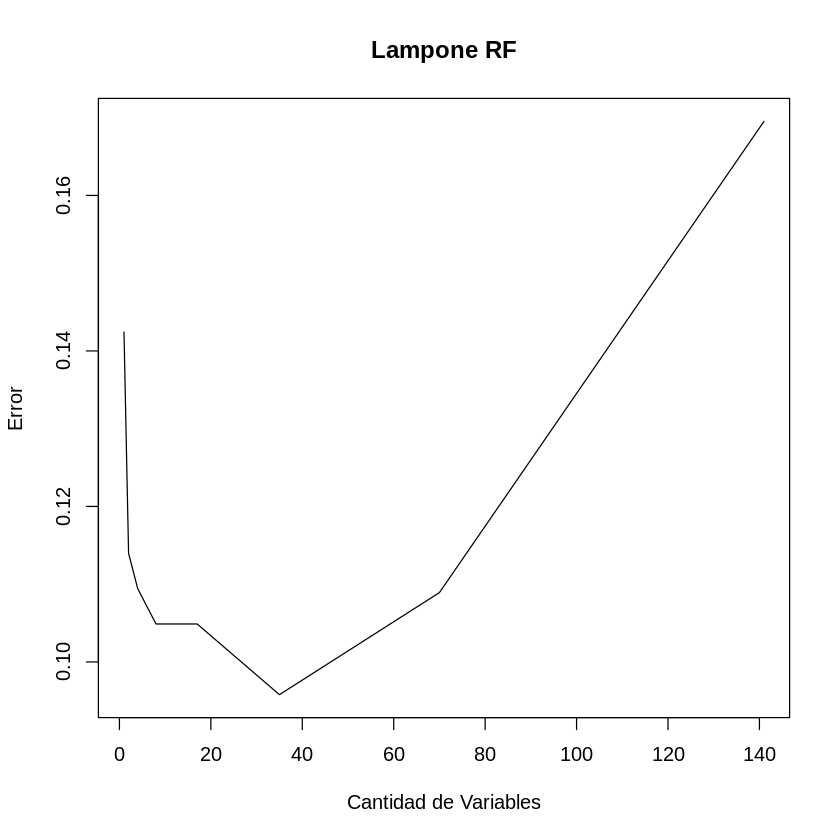

In [ ]:
plot(lampone.rf$n.vars, lampone.rf$rf.errors, type="l", xlab="Cantidad de Variables", ylab="Error", main="Lampone RF")

Evaluo como en el ejercicio 1 y me quedo con el RF que menor error tenga (en este caso es el que toma 35 variables)

## Boosting

In [2]:
boosting.error.depth = function(ds.train, ds.test, y, m.depth) {
  b.train.error = c()
  b.test.error = c()

  for (depth in 1:m.depth) {
    b.adaboost = boosting(y, data=ds.train, mfinal = 10, coef="Freund", control=rpart.control(maxdepth=depth))
    b.train.predict = predict(b.adaboost, ds.train)
    b.train.error = c(b.train.error, b.train.predict$error)

    b.test.predict = predict(b.adaboost, ds.test)
    b.test.error = c(b.test.error, b.test.predict$error)
  }

  return (list(train.error=b.train.error, test.error=b.test.error))
}

In [ ]:
k.folds = cut(seq(1, nrow(lampone.data)), breaks=4, labels=FALSE)
lampone.shuffled = lampone.data[sample(nrow(lampone.data)),]

$train.error
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

$test.error
 [1] 0.16666667 0.08333333 0.00000000 0.00000000 0.08333333 0.08333333
 [7] 0.16666667 0.16666667 0.00000000 0.08333333 0.00000000 0.08333333
[13] 0.00000000 0.00000000 0.08333333 0.08333333 0.08333333 0.08333333
[19] 0.16666667 0.08333333

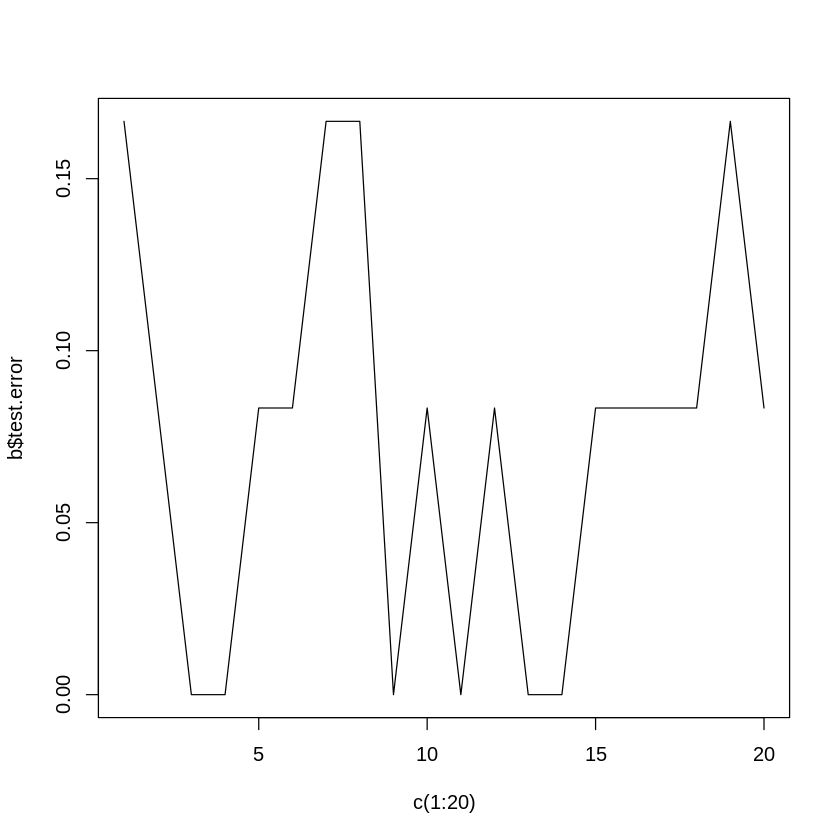

In [ ]:
b = boosting.error.depth(lampone.shuffled[k.folds!=2,], lampone.shuffled[k.folds==2,], N_tipo ~ ., 20)
plot(c(1:20), b$test.error, type="l")
b

Quiero ver cual seria el mejor depth de los arboles para este problema. Lo corri varias veces y el que mas se repetia era el numero 4

In [4]:
boosting.error = function(ds.train, ds.test, y, depth) {
  b.adaboost = boosting(y, data=ds.train, mfinal = 10, coef="Freund", control=rpart.control(maxdepth=depth))
  b.train.predict = predict(b.adaboost, ds.train)
  b.train.error = b.train.predict$error

  b.test.predict = predict(b.adaboost, ds.test)
  b.test.error = b.test.predict$error

  return (list(train.error=b.train.error, test.error=b.test.error))
}

In [ ]:
lampone.b.error = c()
for (k in 1:4) {
  k.test = lampone.shuffled[k.folds==k,]
  k.train = lampone.shuffled[k.folds!=k,]

  k.errors = boosting.error(k.train, k.test, N_tipo ~ ., 4)
  lampone.b.error = c(lampone.b.error, k.errors$test.error)
}

cat("lampone.b.error:", lampone.b.error, "\n")
cat("mean(lampone.b.error): ", mean(lampone.b.error), "\n", sep = "")

lampone.b.error: 0.07692308 0 0.08333333 0.08333333 
mean(lampone.b.error): 0.06089744


## SVM
Para los parametros, decidi usar valores que me recomendaron :)

### RBF

In [ ]:
lampone.svm.rbf.error = c()
for (k in 1:4) {
  k.test = lampone.shuffled[k.folds==k,]
  k.train = lampone.shuffled[k.folds!=k,]

  k.svm = suppressWarnings(svm(N_tipo ~., data=k.train, kernel="radial", gamma=0.01, cost=2))
  k.pred = predict(k.svm, k.test)

  lampone.svm.rbf.error = c(lampone.svm.rbf.error, mean(k.pred != k.test$N_tipo))
}

cat("lampone.svm.rbf.error:", lampone.svm.rbf.error, "\n")
cat("mean(lampone.svm.rbf.error): ", mean(lampone.svm.rbf.error), "\n", sep = "")

lampone.svm.rbf.error: 0.5384615 0.4166667 0.5 0.6666667 
mean(lampone.svm.rbf.error): 0.5304487


### Polinomial

In [ ]:
lampone.svm.p.error = c()
for (k in 1:4) {
  k.test = lampone.shuffled[k.folds==k,]
  k.train = lampone.shuffled[k.folds!=k,]

  k.svm = suppressWarnings(svm(N_tipo ~., data=k.train, kernel="polynomial", gamma=0.01, cost=2))
  k.pred = predict(k.svm, k.test)

  lampone.svm.p.error = c(lampone.svm.p.error, mean(k.pred != k.test$N_tipo))
}

cat("lampone.svm.p.error:", lampone.svm.p.error, "\n")
cat("mean(lampone.svm.p.error): ", mean(lampone.svm.p.error), "\n", sep = "")

lampone.svm.p.error: 0.1538462 0.3333333 0.08333333 0 
mean(lampone.svm.p.error): 0.1426282


# Conclusiones

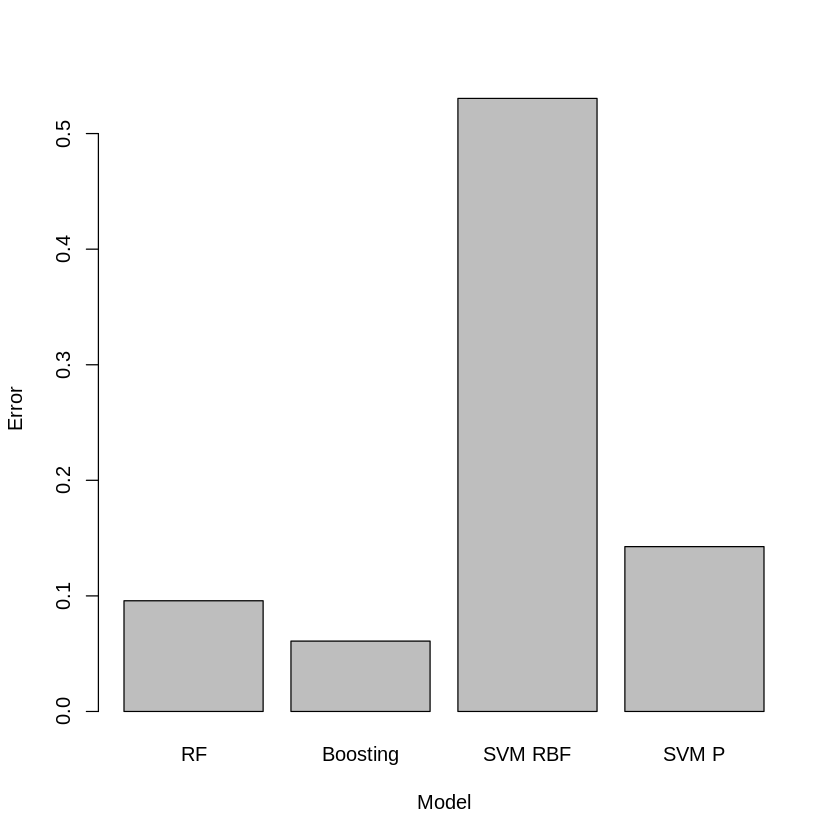

In [ ]:
models = c("RF", "Boosting", "SVM RBF", "SVM P")
barplot(height=c(lampone.rf$rf.errors[3], mean(lampone.b.error), mean(lampone.svm.rbf.error), mean(lampone.svm.p.error)), names.arg=models, , xlab="Model", ylab="Error")

Como podemos ver, segun los resultados, el modelo que menor error tiene es el Boosting, seguido por RF. El modelo de Boosting lo corri varias veces y este fue el mejor resutado, y queria destacar que varias veces RF era el modelo con menor error.

Podemos ver que el Kernel RBF es el peor modelo, con un error aprox del 50% en todas las corridas que hice.

La verdad que no puedo concluir que los Kernel son malos para este dataset ya que el Kernel Polinomial obtuvo un buen resultado, bastante cercano a RF

# Ejercicio 4

## RF

$n.vars
[1] 69 34 17  8  4  2  1

$rf.errors
[1] 0.04243626 0.03912181 0.03886686 0.03937677 0.04000000 0.04147309 0.04603399

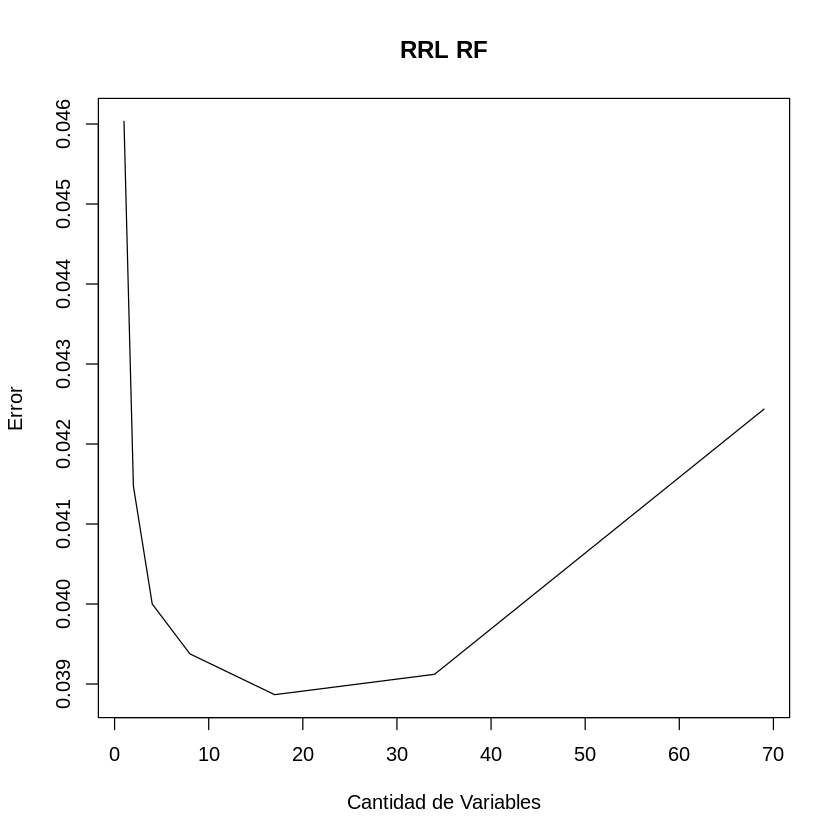

In [6]:
RRL.rf = rf.test(RRL, Tipo ~ .)
RRL.rf
plot(RRL.rf$n.vars, RRL.rf$rf.errors, type="l", xlab="Cantidad de Variables", ylab="Error", main="RRL RF")

Buscamos el mejor RF segun la cantidad de variables, en esta caso nos quedamos con el RF de 17 variables.

## Boosting

In [6]:
k.folds = cut(seq(1, nrow(RRL)), breaks=5, labels=FALSE)
RRL.shuffled = RRL[sample(nrow(RRL)),]

$train.error
 [1] 0.077195467 0.064978754 0.046565156 0.036473088 0.022839943 0.013810198
 [7] 0.009383853 0.006196884 0.008498584 0.004603399 0.004603399 0.005488669
[13] 0.002124646 0.006019830 0.004249292 0.003895184 0.003718130 0.007082153
[19] 0.003541076 0.004957507

$test.error
 [1] 0.07507082 0.07223796 0.05169972 0.04674221 0.04603399 0.04532578
 [7] 0.03682720 0.04249292 0.04815864 0.03399433 0.04957507 0.03895184
[13] 0.04603399 0.03966006 0.04107649 0.04107649 0.03753541 0.04320113
[19] 0.04532578 0.04178470

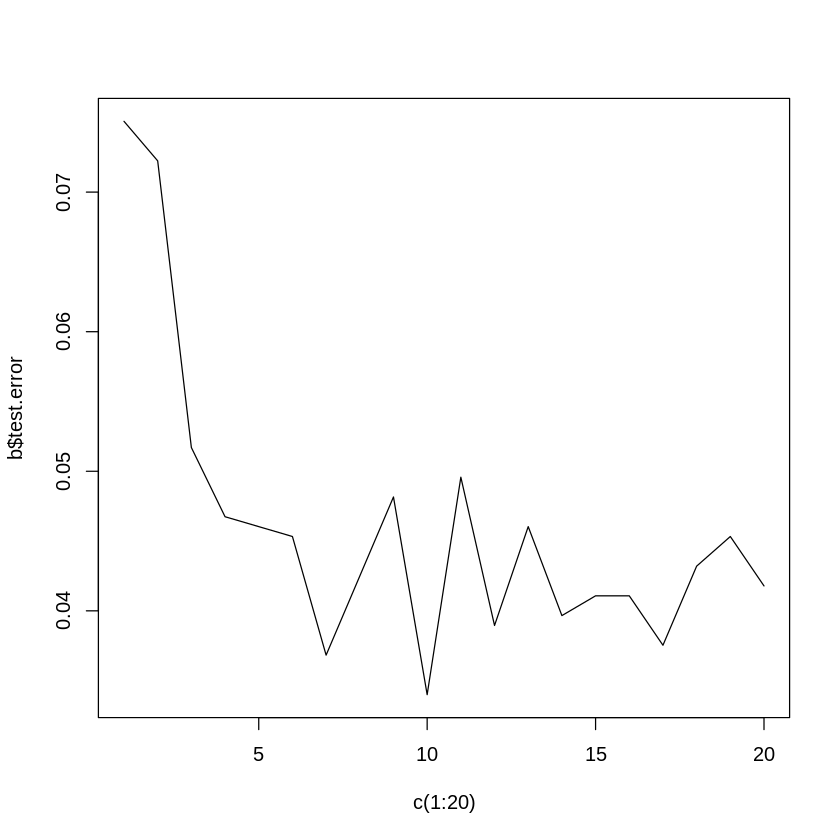

In [7]:
b = boosting.error.depth(RRL.shuffled[k.folds!=2,], RRL.shuffled[k.folds==2,], Tipo ~ ., 20)
plot(c(1:20), b$test.error, type="l")
b

Como en el ejercicio anterior, estamos buscando el depth de los arboles y decidi probar con valores de 10 a 15 y el mejor que me dio fue 13.

In [9]:
RRL.b.error = c()
for (k in 1:4) {
  k.test = RRL.shuffled[k.folds==k,]
  k.train = RRL.shuffled[k.folds!=k,]

  k.errors = boosting.error(k.train, k.test, Tipo ~ ., 13)
  RRL.b.error = c(RRL.b.error, k.errors$test.error)
}

cat("RRL.b.error:", RRL.b.error, "\n")
cat("mean(RRL.b.error): ", mean(RRL.b.error), "\n", sep = "")

RRL.b.error: 0.0368272 0.04532578 0.04886686 0.04815864 
mean(RRL.b.error): 0.04479462


## SVM

### RBF

In [10]:
RRL.svm.rbf.error = c()
for (k in 1:4) {
  k.test = RRL.shuffled[k.folds==k,]
  k.train = RRL.shuffled[k.folds!=k,]

  k.svm = suppressWarnings(svm(Tipo ~., data=k.train, kernel="radial", gamma=0.01, cost=2))
  k.pred = predict(k.svm, k.test)

  RRL.svm.rbf.error = c(RRL.svm.rbf.error, mean(k.pred != k.test$Tipo))
}

cat("RRL.svm.rbf.error:", RRL.svm.rbf.error, "\n")
cat("mean(RRL.svm.rbf.error): ", mean(RRL.svm.rbf.error), "\n", sep = "")

RRL.svm.rbf.error: 0.07648725 0.07790368 0.09844193 0.0786119 
mean(RRL.svm.rbf.error): 0.08286119


### Polinomial

In [11]:
RRL.svm.p.error = c()
for (k in 1:4) {
  k.test = RRL.shuffled[k.folds==k,]
  k.train = RRL.shuffled[k.folds!=k,]

  k.svm = suppressWarnings(svm(Tipo ~., data=k.train, kernel="polynomial", gamma=0.01, cost=2))
  k.pred = predict(k.svm, k.test)

  RRL.svm.p.error = c(RRL.svm.p.error, mean(k.pred != k.test$Tipo))
}

cat("RRL.svm.p.error:", RRL.svm.p.error, "\n")
cat("mean(RRL.svm.p.error): ", mean(RRL.svm.p.error), "\n", sep = "")

RRL.svm.p.error: 0.1048159 0.1168555 0.1267705 0.1196884 
mean(RRL.svm.p.error): 0.1170326


## Conclusiones

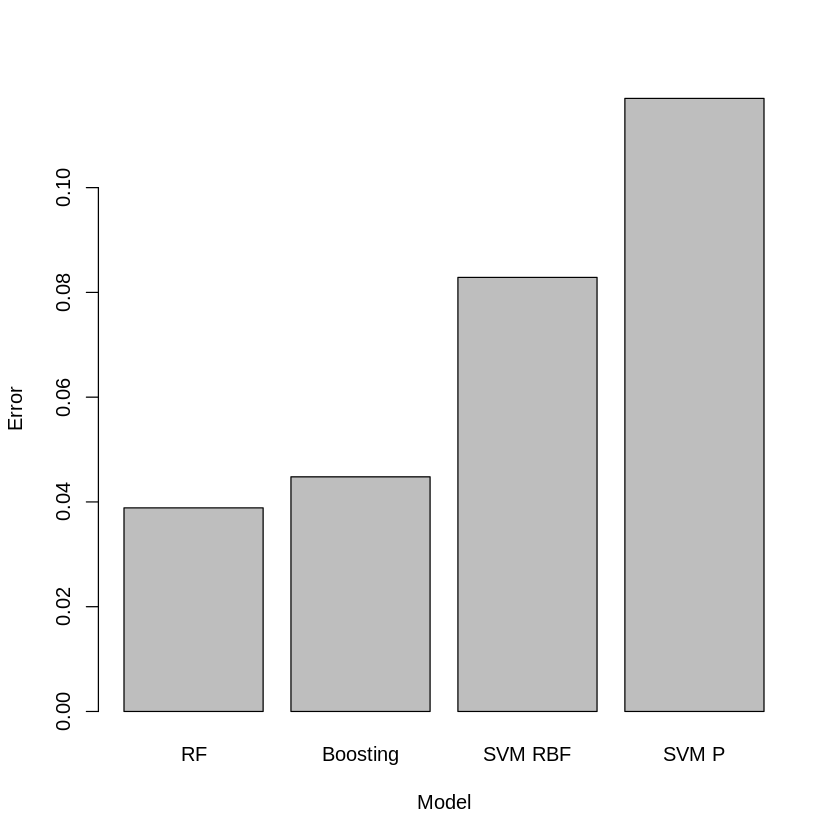

In [12]:
models = c("RF", "Boosting", "SVM RBF", "SVM P")
barplot(height=c(RRL.rf$rf.errors[3], mean(RRL.b.error), mean(RRL.svm.rbf.error), mean(RRL.svm.p.error)), names.arg=models, , xlab="Model", ylab="Error")

Como en el dataset anterior, los mejores modelos fueron RF y Boosting, en ese orden. Tambien se repite que los Kernels tienen un mayor error que los otros modelos y podemos decir que no son tan optimos para resolverlos.